In [2]:
import soundfile as sf
import numpy as np
import torch
import torchaudio
import matplotlib.pyplot as plt

In [89]:
import torch
import torch.fft as fft

def hilbert_transform(signal):
    # Compute the FFT of the signal
    fft_result = fft.fft(signal)

    # Create a frequency vector
    n = signal.shape[-1]
    freq_vector = torch.fft.fftfreq(n, d=1.0)

    # Generate the Hilbert kernel
    hilbert_kernel = torch.zeros_like(freq_vector)
    hilbert_kernel[1:n//2] = 2  # Positive frequencies
    hilbert_kernel[n//2+1:] = -2  # Negative frequencies

    # Apply the Hilbert kernel in the frequency domain
    hilbert_result_freq = fft_result * hilbert_kernel

    # Compute the inverse FFT to obtain the Hilbert Transform
    hilbert_result = fft.ifft(hilbert_result_freq)

    # Return the complex-valued analytic signal
    return hilbert_result

def est_finst(X):
    n_fft = (X.shape[0]-1)*2
    k = torch.arange(0, X.shape[0], 1).view(-1, 1)
    W = torch.exp(-1j*2*torch.pi*k/n_fft)
    Z = X[:, :-1] * torch.conj(X[:, 1:]) * W
    f_inst = Z.I()
    return f_inst

def est_groupdelay(x, fs):
    n = torch.arange(0, x.shape[-1], 1) / fs
    X = torch.stft(x, 512, 128, 512, return_complex=True)
    Y = torch.stft(x*n, 512, 128, 512, return_complex=True)
    gd = (X.real * Y.real + X.imag * Y.imag) / X.abs()    
    return gd

In [85]:
fname = r'/media/avi/54561652561635681/datasets/ARCTIC/cmu_us_aew_arctic/wav/arctic_a0004.wav'
x, fs = sf.read(fname)
x = torch.from_numpy(x)
X = torch.stft(x, 512, 32, 512, return_complex=True)

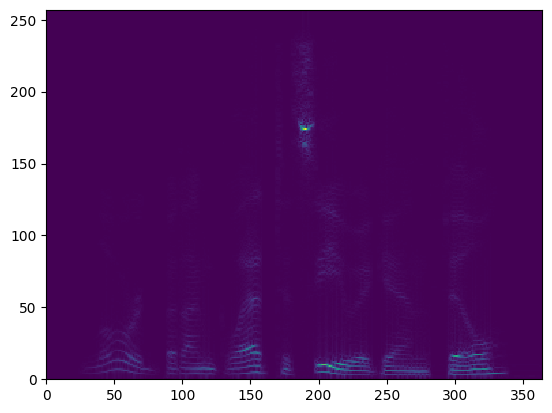

In [86]:
gd = est_groupdelay(x, fs)
plt.pcolor(gd)
plt.show()

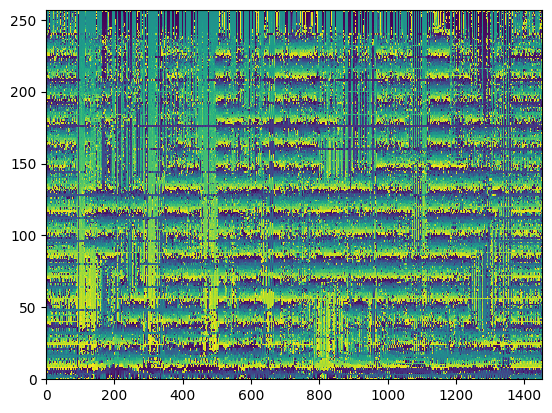

In [90]:
Xa = hilbert_transform(X)
f_inst = est_finst(Xa) * (fs / (2 * np.pi))
fig, ax = plt.subplots(1)
ax.pcolor(f_inst)
plt.show()